# Zonal Statistics on GeoPandas

### Cargamos las librerías


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


Cargamos $\texttt{fiona}$ que es una biblioteca de python que: 

Fiona is OGR’s neat and nimble API for Python programmers.

Fiona is designed to be simple and dependable. It focuses on reading and writing data in standard Python IO style and relies upon familiar Python types and protocols such as files, dictionaries, mappings, and iterators instead of classes specific to OGR. Fiona can read and write real-world data using multi-layered GIS formats and zipped virtual file systems and integrates readily with other Python GIS packages such as pyproj, Rtree, and Shapely. Fiona is supported only on CPython versions 2.7 and 3.4+.

PD: Geospatial Data Abstraction Library o GDAL (también conocida como GDAL/OGR) es una biblioteca de software para la lectura y escritura de formatos de datos geoespaciales, publicada bajo la MIT License por la fundación geoespacial de código abierto (Open Source Geospatial Foundation). Como biblioteca, presenta un único modelo abstracto de datos al uso que llama para todos los formatos soportados. También viene con una variedad de utilidades en línea de comando para la traducción y el proceso de datos geoespaciales.


In [ ]:
import fiona; fiona.supported_drivers

### Cargamos nuestra capa de municipios

In [3]:
# Shape de municipios
municipios = gpd.read_file('/home/milo/Documents/Python/GeoPandas/shapes/muni_2012gw/')

# Vemos su sistema de referencia
municipios.crs

{'init': 'epsg:4326'}

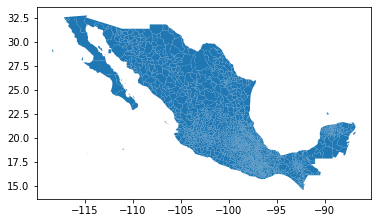

In [4]:
municipios.plot()

### Cargamos los tiff's con las siguientes bibliotecas
* $\texttt{rasterio}$ reads and writes geospatial raster data. Geographic information systems use GeoTIFF and other formats to organize and store gridded, or raster, datasets. Rasterio reads and writes these formats and provides a Python API based on N-D arrays.
* $\texttt{rasterstats}$ is a Python module for summarizing geospatial raster datasets based on vector geometries. It includes functions for zonal statistics and interpolated point queries. The command-line interface allows for easy interoperability with other GeoJSON tools.
* $\texttt{gdal}$ is a number of tools for programming and manipulating the GDAL Geospatial Data Abstraction Library. Actually, it is two libraries – GDAL for manipulating geospatial raster data and OGR for manipulating geospatial vector data – but we’ll refer to the entire package as the GDAL library for the purposes of this document.

In [6]:
import rasterio
import rasterio.plot as rioplot
import rasterstats as rs
import gdal

In [7]:
import os
## Cargamos un tiff de prueba
# Definimos la ruta
Tmax_1979_01_tiff = os.path.join('/home/milo/Documents/Python/GeoPandas/CCA/Tmax_2009/Tmax_2009/Geotiff', 'Tmax_2009_01.tif')
# Cargamos el tiff
Tmax_1979_01 = rasterio.open(Tmax_1979_01_tiff)
# Examine the metadata read from the raster file (we can confirm CRS is epsg:4326), then plot the raster.
Tmax_1979_01.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 2101,
 'height': 1201,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:4326'),
 'transform': Affine(0.016666666670000007, 0.0, -120.0,
        0.0, -0.016666666670000004, 34.01666667067)}

### Visualizamos el tiff


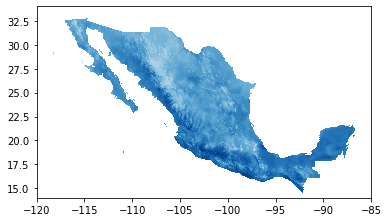

In [8]:
rioplot.show(Tmax_1979_01, with_bounds=True, cmap=plt.cm.Blues);

### Utilizaremos $\texttt{zonal_stats}$ de la librería $\texttt{rasterstats}$

$\texttt{zonal_stats}$ returns a geojson with the original properties plus the zonal statistics. Por tal motivo, tansformamos el resultado a un GeoDataFrame.

In [9]:
## Con la siguiente instrucción generamos un geojson
zonal_gjson = rs.zonal_stats(municipios, Tmax_1979_01_tiff, prefix='zonal_',
                                 geojson_out=True)
## Lo transformamos a GeoDataFrame
zonal_gdf = gpd.GeoDataFrame.from_features(zonal_gjson)
zonal_gdf.head(5)

,geometry,CVE_ENT,CVE_MUN,NOM_MUN,OID_1,cov_,cov_id,zonal_min,zonal_max,zonal_mean,zonal_count
0,"POLYGON ((-102.33568 22.05067, -102.33348 22.0...",01,005,Jesús María,1,1,2,21.000000,24.9,23.714013,157
1,"POLYGON ((-102.15272 22.08962, -102.15100 22.0...",01,011,San Francisco de los Romo,2,2,3,23.299999,24.6,24.082610,46
2,"POLYGON ((-102.10641 22.06035, -102.10368 22.0...",01,001,Aguascalientes,3,3,4,22.600000,26.6,24.757333,375
3,"POLYGON ((-102.45611 22.32323, -102.45537 22.3...",01,008,San José de Gracia,4,4,5,17.600000,23.9,21.642963,270
4,"POLYGON ((-102.22684 22.37393, -102.22661 22.3...",01,007,Rincón de Romos,5,5,6,20.700001,24.4,22.885950,121


## Manejo de contenedores netCDF

In [11]:
from netCDF4 import Dataset
rootgrp = Dataset("test.nc", "w", format="NETCDF4")
print(rootgrp.data_model)

NETCDF4


In [90]:
my_example_nc_file = '/home/milo/Documents/Python/GeoPandas/netCDF/data/ICOADS_R3.0.0_2010-01.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [91]:
### Visualizamos los metadatos de la base
fh.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(obs)
                  long_name: time
                  standard_name: time
                  units: days since 1662-10-15 12:00:00
                  calendar: julian
                  axis: T
                  comment: Julian days since the beginning of the ICOADS record, which is 1662-10-15 12:00:00. Missing values of date (DD in date) are replaced by 0 and missing values in HR are filled with 0.0 in this calculation. See actual values in date, HR for reference.
              unlimited dimensions: 
              current shape = (1967379,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('date', <class 'netCDF4._netCDF4.Variable'>
              |S1 date(obs, DATE_len)
                  long_name: date in YYYYMMDD
                  format: YYYYMMDD
                  comment: YYYY: four digital year, MM: two digital month and DD: two digital date. Missing value

In [39]:
### Visualizamos todas las variables en la base
fh.variables.keys()

odict_keys(['time', 'date', 'crs', 'HR', 'lat', 'lon', 'TI', 'LI', 'DS', 'VS', 'NID', 'II', 'ID', 'C1', 'DI', 'D', 'WI', 'W', 'VI', 'VV', 'WW', 'W1', 'SLP', 'A', 'PPP', 'IT', 'AT', 'WBTI', 'WBT', 'DPTI', 'DPT', 'SI', 'SST', 'N', 'NH', 'CL', 'HI', 'H', 'CM', 'CH', 'WD', 'WP', 'WH', 'SD', 'SP', 'SH', 'B10', 'B1', 'DCK', 'SID', 'PT', 'DUPS', 'DUPC', 'ND', 'SF', 'AF', 'UF', 'VF', 'PF', 'RF', 'ZNC', 'WNC', 'BNC', 'XNC', 'YNC', 'PNC', 'ANC', 'GNC', 'DNC', 'SNC', 'CNC', 'ENC', 'FNC', 'TNC', 'QCE', 'QCZ', 'OS', 'OP', 'FM', 'IMMV', 'IX', 'W2', 'WMI', 'SD2', 'SP2', 'SH2', 'IS', 'ES', 'RS', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IR', 'RRR', 'TR', 'NU', 'QCI', 'QI1', 'QI2', 'QI3', 'QI4', 'QI5', 'QI6', 'QI7', 'QI8', 'QI9', 'QI10', 'QI11', 'QI12', 'QI13', 'QI14', 'QI15', 'QI16', 'QI17', 'QI18', 'QI19', 'QI20', 'QI21', 'HDG', 'COG', 'SOG', 'SLL', 'SLHH', 'RWD', 'RWS', 'QI22', 'QI23', 'QI24', 'QI25', 'QI26', 'QI27', 'QI28', 'QI29', 'RH', 'RHI', 'AWSI', 'IMONO', 'CCCC', 'BUID', 'FBSRC', 'BMP', 'BSWU', 'SW

In [54]:
### Seleccionamos algunas variables 

# time
#fh.variables['time']
# date
#fh.variables['date']
# crs
#fh.variables['crs']
# lat
#fh.variables['lat']
# lon
#sfh.variables['lon']
# IT (Temperature Indicator)
#fh.variables['IT']

<class 'netCDF4._netCDF4.Variable'>
float32 lon(obs)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    valid_min: 0.0
    valid_max: 359.99
    axis: X
    ancillary_variables: QI20
unlimited dimensions: 
current shape = (1967379,)
filling on, default _FillValue of 9.969209968386869e+36 used

Now we can read the data from any of the variables contained in fh. For this example, we’ll just read the coordinate variables (lat, lon) and the Tmax variable. This puts each of these variables into numpy arrays.

In [158]:
import numpy as np

lons = fh.variables['lon'][:1967]
lats = fh.variables['lat'][:1967]
#### January 15, 2014
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables['time'])
IT = fh.variables['IT'][timeindex]


/home/milo/miniconda3/envs/GDAL/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  This is separate from the ipykernel package so we can avoid doing imports until


Finally, it is good form to close the file when you are finished.



In [64]:
fh.close()


## Plotting georeferenced data using Python


Now that we have our data in numpy arrays, we can move forward, using Python and Matplotlib to plot our data.

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Next, we setup a Basemap instance, specifying our desired map and projection settings.

In [156]:
## Vemos los mínimos y máximos de longitud y latitud

[lons.max(),lons.min(),lats.max(),lats.min()]

[359.94, 0.0, 86.32, -73.6]

In [106]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

/home/milo/miniconda3/envs/GDAL/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


When we give this Basemap instance our coordinate variables, it returns our plotting coordinates. This is how basemap knows where to put our projected data on the map.

In [157]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

In [163]:
IT

masked_array(data=3,
             mask=False,
       fill_value=999999,
            dtype=int16)

/home/milo/miniconda3/envs/GDAL/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


ValueError: not enough values to unpack (expected 2, got 0)

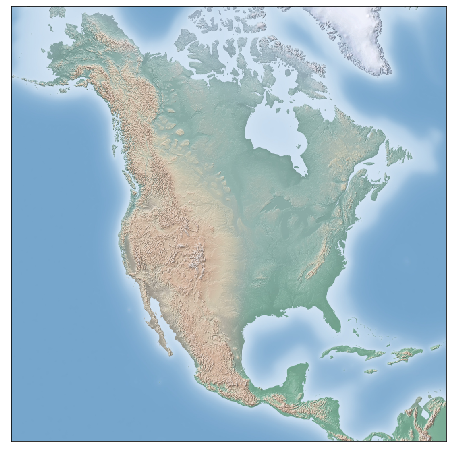

In [159]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, IT,
             latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');

## Exploramos con otros datos


In [125]:
my_ruta = '/home/milo/Documents/Python/GeoPandas/netCDF/data/gistemp250_GHCNv4.nc'
data = Dataset(my_ruta, mode='r')

The file contains many global temperature readings on a variety of dates; we need to select the index of the date we're interested in—in this case, January 15, 2014:

In [126]:
data.variables.keys()

odict_keys(['lat', 'lon', 'time', 'time_bnds', 'tempanomaly'])

In [137]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables['time'])

Now we can load the latitude and longitude data, as well as the temperature anomaly for this index:

In [150]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

Finally, we'll use the pcolormesh() method to draw a color mesh of the data. We'll look at North America, and use a shaded relief map in the background. Note that for this data we specifically chose a divergent colormap, which has a neutral color at zero and two contrasting colors at negative and positive values. We'll also lightly draw the coastlines over the colors for reference:

/home/milo/miniconda3/envs/GDAL/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


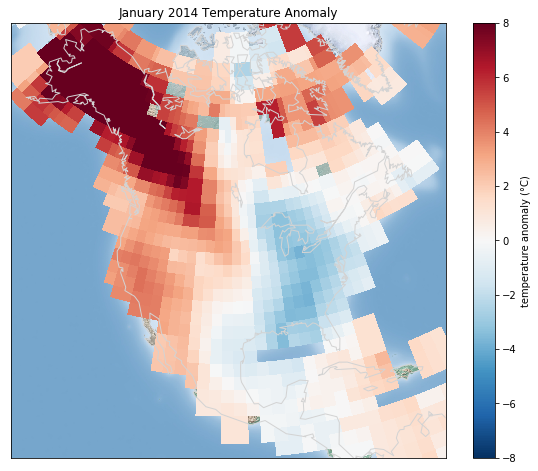

In [153]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly,
             latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');

#### Fuentes:

* https://joehamman.com/2013/10/12/plotting-netCDF-data-with-Python/
* http://pyhogs.github.io/intro_netcdf4.html
* https://www.wemcouncil.org/wp/wemc-tech-blog-2-plotting-netcdf-with-python/
* https://www.aosc.umd.edu/~cmartin/python/examples/netcdf_example1.html

##### Este está muy bueno
* https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

#### Datos

http://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz

### Install Basemap
https://gist.github.com/junzis/36fee36acd7cadfdf1c01c06d97f4947

## Para el problema del tamaño del array
https://stackoverflow.com/questions/57507832/unable-to-allocate-array-with-shape-and-data-type